In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats

In [3]:
state_gun_provisions = pd.read_csv('gun_law_summary_v2.csv')

state_gun_provisions = state_gun_provisions.drop('Unnamed: 0', axis=1)

state_gun_provisions = state_gun_provisions.rename(columns = {'state':'State'})

state_gun_provisions = state_gun_provisions.drop('year', axis=1)

state_gun_provisions = state_gun_provisions.set_index('State')

In [4]:
state_gun_provisions.head()

,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,alctreatment,amm18,...,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal
State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,10
Alaska,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
Arizona,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
Arkansas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
California,0,1,0,1,0,0,0,1,0,1,...,1,1,1,1,1,1,1,1,1,100


In [5]:
heat_map_df = state_gun_provisions.copy()
heat_map_df = heat_map_df.sort_values('lawtotal', ascending=False)
heat_map_df = heat_map_df.drop(['lawtotal'], axis=1)

In [6]:
heat_map_df.head()

,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,alctreatment,amm18,...,training,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh
State,,,,,,,,,,,,,,,,,,,,,
California,0,1,0,1,0,0,0,1,0,1,...,1,1,1,1,1,1,1,1,1,1
Massachusetts,1,1,1,1,1,0,0,0,1,1,...,1,0,0,1,1,0,0,1,0,0
Connecticut,1,1,1,1,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,0,0
Hawaii,1,1,1,1,0,1,1,0,1,0,...,1,0,0,1,1,1,1,1,1,1
New York,0,0,1,1,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,0,0


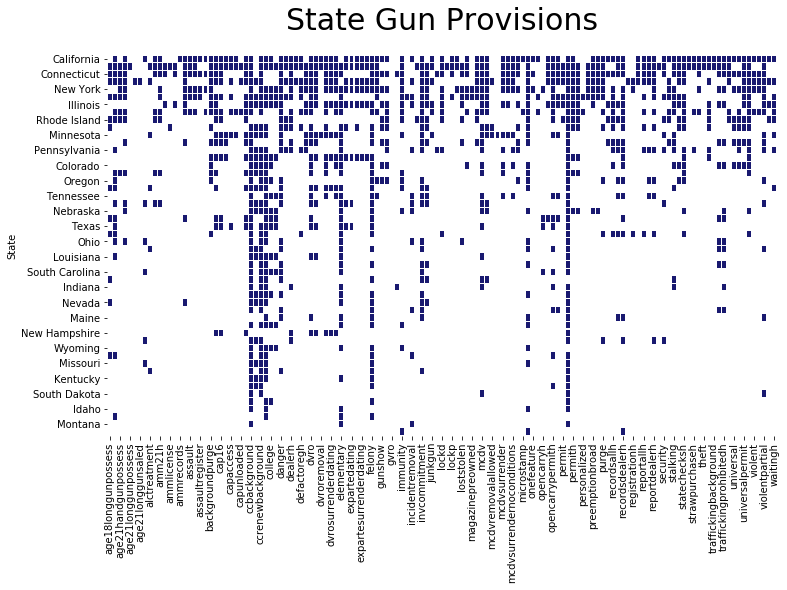

In [7]:
fig, ax = plt.subplots(figsize=(12,7))

title= 'State Gun Provisions'

plt.title(title,fontsize=30)
ttl = ax.title
ttl.set_position([0.5,1.05])

sns.heatmap(heat_map_df,
            cmap=ListedColormap(['white', 'midnightblue']),
            cbar=False,
            linecolor='white',
            linewidths=0.05,
            ax=ax)

plt.show()

In [8]:
gun_deaths_df = pd.read_csv('Gun_Death_Events_By_ICD-10_113_Cause.txt', sep='\t')

In [9]:
years_list = [2013,2014,2015,2016]

data_by_year_dict = dict()

for year in years_list: 
    data_by_year_dict[year]= gun_deaths_df.loc[gun_deaths_df['Year'] == year]
    data_by_year_dict[year] = data_by_year_dict[year].drop('Year', axis=1)
    data_by_year_dict[year] = pd.pivot_table(data_by_year_dict[year],
                   values = 'Deaths',
                   index='State',
                   columns = 'ICD-10 113 Cause')
    data_by_year_dict[year] = data_by_year_dict[year].rename(columns =  {
        '#Legal intervention (Y35,Y89.0)':'Legal Intervention',
        'Accidental discharge of firearms (W32-W34)':'Accidental',
        'Assault (homicide) by discharge of firearms (*U01.4,X93-X95)':'Homocide',
        'Intentional self-harm (suicide) by discharge of firearms (X72-X74)':'Suicide'}
                              )
    data_by_year_dict[year]['Total'] = data_by_year_dict[year].sum(axis=1)

In [10]:
data_by_year_dict[2016].head()

ICD-10 113 Cause,Legal Intervention,Accidental,Homocide,Suicide,Total
State,,,,,
Alabama,12,21,454,550,1037
Alaska,0,0,45,113,158
Arizona,13,0,303,755,1071
Arkansas,0,11,182,331,524
California,74,36,1467,1595,3172


In [11]:
census_data_df = pd.read_csv('us_census_sorted_data.csv')

census_data_df = census_data_df.drop('Unnamed: 0', axis=1)

census_data_df = census_data_df.rename(columns={
    'State Name':'State',
    'income per capita':'Income Per Capita',
    'unemployment_rate(%)':'Unemployment Rate',
    'poverty_rate(%)':'Poverty Rate',
    'no_college_education_rate(%)':'No College Education Rate'
})
census_data_df = census_data_df.set_index('State')

In [12]:
law_census_df = census_data_df.join(state_gun_provisions)

In [13]:
law_census_df.head()

,Population,Income Per Capita,Unemployment Rate,Poverty Rate,No College Education Rate,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,...,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal
State,,,,,,,,,,,,,,,,,,,,,
Alabama,4817678.0,23936.0,4.747432,18.467610,17.988957,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
Alaska,728300.0,33129.0,4.407112,9.867637,14.591377,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
Arizona,6561516.0,25537.0,4.634097,17.820714,14.217233,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
Arkansas,2947036.0,22595.0,3.905280,18.639168,19.922322,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
California,38066920.0,29906.0,5.476051,16.064457,13.719686,0,1,0,1,0,...,1,1,1,1,1,1,1,1,1,100


In [14]:
provisions_list = list(state_gun_provisions.columns)

provisions_load_df = pd.DataFrame('', index=provisions_list, columns=['In Population', 'Out Population'])

provisions_load_df = provisions_load_df.drop('lawtotal')

In [15]:
population_size_df = law_census_df.copy()

population_size_df = population_size_df.drop(['Income Per Capita',
                                              'Unemployment Rate',
                                              'Poverty Rate',
                                              'No College Education Rate',
                                              'lawtotal'], axis=1)

population_size_df['Population'] = population_size_df['Population'].astype(int)

law_list = population_size_df.columns

law_list = law_list[1:]

for law in law_list:
    population_size_df[law] = population_size_df[law]* population_size_df['Population']
    
population_size_df = population_size_df.drop('Population', axis=1)

In [16]:
population_size_df.head()

,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,alctreatment,amm18,...,training,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh
State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,4817678,0,0,...,0,0,0,0,0,0,0,0,0,0
Alaska,0,728300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,6561516,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arkansas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
California,0,38066920,0,38066920,0,0,0,38066920,0,38066920,...,38066920,38066920,38066920,38066920,38066920,38066920,38066920,38066920,38066920,38066920


In [17]:
for i, row in provisions_load_df.iterrows():
    provisions_load_df.loc[i,'Total States'] = law_census_df[i].sum()
    
for i, row in provisions_load_df.iterrows():
    provisions_load_df.loc[i,'In Population'] = population_size_df[i].sum()
    
for i, row in provisions_load_df.iterrows():
    provisions_load_df.loc[i,'Out Population'] = census_data_df['Population'].sum() - population_size_df[i].sum()
    
provisions_load_df["Population Check"] = provisions_load_df["In Population"] + provisions_load_df["Out Population"]

provisions_load_df["% of US Population Impacted"] = (provisions_load_df["In Population"] / provisions_load_df["Population Check"])*100

provisions_load_df = provisions_load_df.sort_values('% of US Population Impacted')

In [18]:
provisions_load_df['% of States'] = (provisions_load_df['Total States'] / 50)*100

In [19]:
provisions_load_df.head()

,In Population,Out Population,Total States,Population Check,% of US Population Impacted,% of States
gvro,0,313473348,0.0,313473348,0.000000,0.0
registration,1392704,312080644,1.0,313473348,0.444281,2.0
age21longgunsale,1392704,312080644,1.0,313473348,0.444281,2.0
age21longgunsaled,1392704,312080644,1.0,313473348,0.444281,2.0
mcdvremovalrequired,5383661,308089687,1.0,313473348,1.717422,2.0


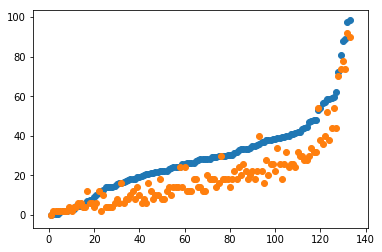

In [20]:
x_axis= list(np.linspace(1,133,133))

plt.scatter(x_axis,provisions_load_df['% of US Population Impacted'])
plt.scatter(x_axis,provisions_load_df['% of States'])

In [21]:
state_law_copy = heat_map_df.copy()

law_state_lookup = {column: [] for column in state_law_copy}

for column in state_law_copy:
    for i, row in state_law_copy.iterrows():
        if state_law_copy.loc[i, column] == 1:
            law_state_lookup[column].append(i) 
            
states_list = list(population_size_df.index)

In [22]:
for key in data_by_year_dict.keys():
    for i, row in data_by_year_dict[key].iterrows():
        data_by_year_dict[key].loc[i, 'Population'] = census_data_df.loc[i,'Population'].astype(int)

In [23]:
data_by_year_dict[2016].head()

ICD-10 113 Cause,Legal Intervention,Accidental,Homocide,Suicide,Total,Population
State,,,,,,
Alabama,12,21,454,550,1037,4817678.0
Alaska,0,0,45,113,158,728300.0
Arizona,13,0,303,755,1071,6561516.0
Arkansas,0,11,182,331,524,2947036.0
California,74,36,1467,1595,3172,38066920.0


In [24]:
for key in data_by_year_dict.keys():
    data_by_year_dict[key].loc[:,'Legal Intervention Rate Per 100,000'] = data_by_year_dict[key]['Legal Intervention'] / (data_by_year_dict[key]['Population']/100000)
    data_by_year_dict[key].loc[:,'Accidental Rate Per 100,000'] = data_by_year_dict[key]['Accidental'] / (data_by_year_dict[key]['Population']/100000)
    data_by_year_dict[key].loc[:,'Homocide Rate Per 100,000'] = data_by_year_dict[key]['Homocide'] / (data_by_year_dict[key]['Population']/100000)
    data_by_year_dict[key].loc[:,'Suicide Rate Per 100,000'] = data_by_year_dict[key]['Suicide'] / (data_by_year_dict[key]['Population']/100000)
    data_by_year_dict[key].loc[:,'Total Rate Per 100,000'] = data_by_year_dict[key]['Total'] / (data_by_year_dict[key]['Population']/100000)

In [25]:
data_by_year_dict[2015].head()

ICD-10 113 Cause,Legal Intervention,Accidental,Homocide,Suicide,Total,Population,"Legal Intervention Rate Per 100,000","Accidental Rate Per 100,000","Homocide Rate Per 100,000","Suicide Rate Per 100,000","Total Rate Per 100,000"
State,,,,,,,,,,,
Alabama,0,20,391,528,939,4817678.0,0.000000,0.415138,8.115943,10.959637,19.490717
Alaska,0,0,42,123,165,728300.0,0.000000,0.000000,5.766854,16.888645,22.655499
Arizona,14,0,236,707,957,6561516.0,0.213365,0.000000,3.596730,10.774949,14.585044
Arkansas,0,17,155,342,514,2947036.0,0.000000,0.576851,5.259522,11.604880,17.441253
California,103,29,1396,1559,3087,38066920.0,0.270576,0.076182,3.667226,4.095419,8.109403


In [26]:
state_rate_tables = dict()

for year in years_list: 
    state_rate_tables[year] = data_by_year_dict[year].drop([
        'Legal Intervention',
        'Accidental',
        'Homocide',
        'Suicide',
        'Total',
        'Population'], axis=1)

In [27]:
state_rate_tables[2016].head()

ICD-10 113 Cause,"Legal Intervention Rate Per 100,000","Accidental Rate Per 100,000","Homocide Rate Per 100,000","Suicide Rate Per 100,000","Total Rate Per 100,000"
State,,,,,
Alabama,0.249083,0.435895,9.423627,11.416288,21.524892
Alaska,0.000000,0.000000,6.178772,15.515584,21.694357
Arizona,0.198125,0.000000,4.617835,11.506487,16.322447
Arkansas,0.000000,0.373256,6.175697,11.231624,17.780577
California,0.194395,0.094570,3.853740,4.189990,8.332694


In [28]:
regression_tables = dict()

for year in years_list: 
    regression_tables[year] = pd.DataFrame(
    index = heat_map_df.columns, 
    columns= ['+ Legal Intervention Rate Per 100,000', 
              'X Legal Intervention Rate Per 100,000',
              '+ Accidental Rate Per 100,000', 
              'X Accidental Rate Per 100,000',
              '+ Homocide Rate Per 100,000', 
              'X Homocide Rate Per 100,000',
              '+ Suicide Rate Per 100,000', 
              'X Suicide Rate Per 100,000',
              '+ Total Rate Per 100,000', 
              'X Total Rate Per 100,000'])

In [29]:
for key in regression_tables.keys():
    for column in regression_tables[key]:
        for law, row in regression_tables[key].iterrows():
            if '+' in column:
                regression_tables[key].loc[law,column] = state_rate_tables[key][column.replace('+ ','')][state_rate_tables[key].index.isin(law_state_lookup[law])].sum()
            elif 'X' in column:
                regression_tables[key].loc[law,column] = state_rate_tables[key][column.replace('X ','')][~state_rate_tables[key].index.isin(law_state_lookup[law])].sum()

In [30]:
regression_tables[2016].head()

,"+ Legal Intervention Rate Per 100,000","X Legal Intervention Rate Per 100,000","+ Accidental Rate Per 100,000","X Accidental Rate Per 100,000","+ Homocide Rate Per 100,000","X Homocide Rate Per 100,000","+ Suicide Rate Per 100,000","X Suicide Rate Per 100,000","+ Total Rate Per 100,000","X Total Rate Per 100,000"
age18longgunpossess,0.711062,4.53241,0.208714,4.8456,40.672,164.491,81.5661,360.418,123.158,534.287
age18longgunsale,1.97751,3.26597,0.995167,4.05915,78.9298,126.233,138.278,303.706,220.18,437.264
age21handgunpossess,0.520312,4.72316,0,5.05432,20.0161,185.147,27.2992,414.685,47.8356,609.609
age21handgunsale,1.43781,3.80566,0.198373,4.85594,40.1184,165.045,65.6764,376.308,107.431,550.014
age21longgunpossess,0.165232,5.07824,0,5.05432,1.33688,203.826,2.10296,439.881,3.60507,653.84


In [ ]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the dataset
crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(crashes.sort_values("total", ascending=False),
                 x_vars=crashes.columns[:-3], y_vars=["abbrev"],
                 size=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="Reds_r", edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)